In [148]:
# dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [149]:
# store file path
path = os.path.join('bitcoin_data.csv')
# store in dataframe
df = pd.read_csv(path)
df.head()

,Date,Period,Open,High,Low,Close,Adj Close,Volume
0,1/1/17,1,963.380005,1150.630005,806.659973,888.869995,888.869995,870316976
1,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894
2,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873
3,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803
4,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041


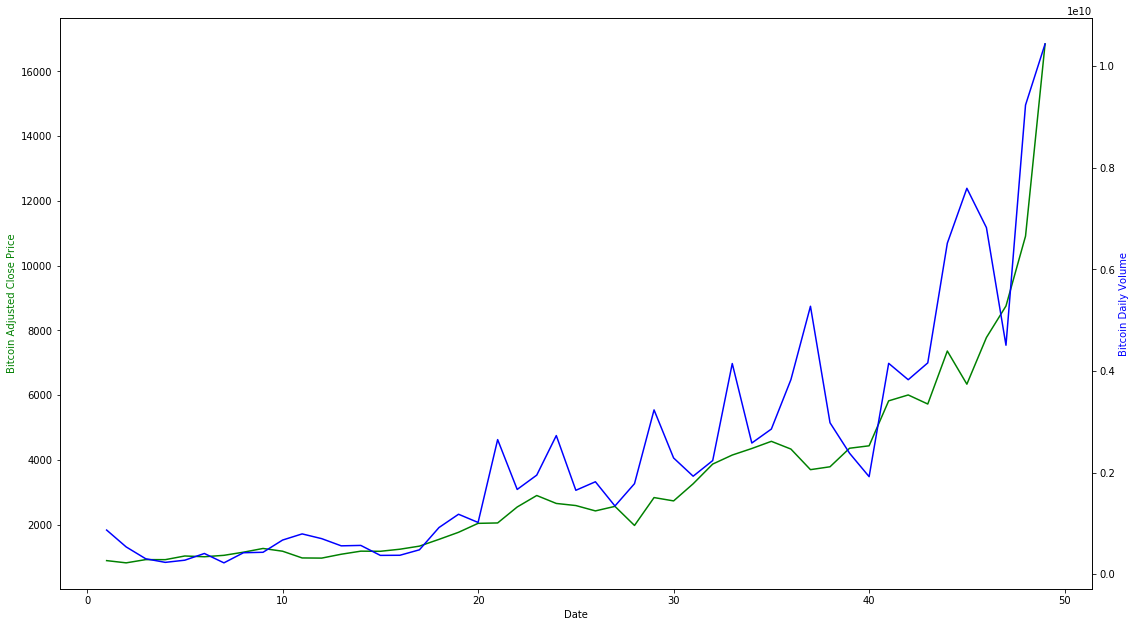

In [260]:
# plot
x = df['Period']
y1 = df['Adj Close']
y2 = df['Volume']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Adjusted Close Price', color='g')
ax2.set_ylabel('Bitcoin Daily Volume', color='b')
fig.set_size_inches(18.5, 10.5)
plt.show()

In [238]:
## Linear Regression
x = df['Volume']
y = df['Adj Close']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: 1.35197519446e-21 r_value: 0.926605446402 std_err: 6.97147888027e-08


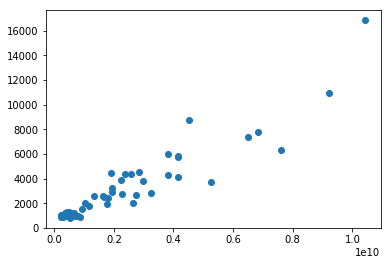

In [236]:
plt.scatter(df['Volume'], df['Adj Close'])
plt.show()

In [192]:
# add empty column
df['Percentage Change in Volume'] = ''
df['Percentage Change in Price'] = ''

# Calculate percentage changes
df['Percentage Change in Volume'] = df['Volume'].pct_change()
df['Percentage Change in Price'] = df['Adj Close'].pct_change()


In [193]:
dfnew=df.dropna(how='any')
dfnew.head()

,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price
1,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897
2,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263
3,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446
4,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395
5,2/5/17,6,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804


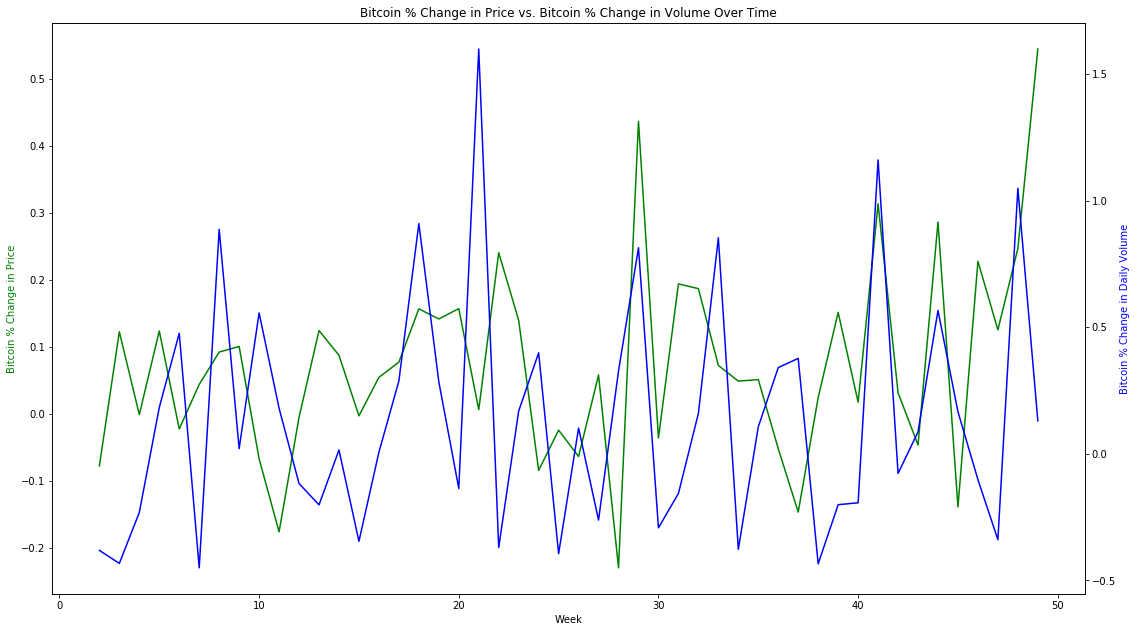

In [261]:
# plot
x = df['Period']
y1 = df['Percentage Change in Price']
y2 = df['Percentage Change in Volume']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('Bitcoin % Change in Price', color='g')
ax2.set_ylabel('Bitcoin % Change in Daily Volume', color='b')
plt.title('Bitcoin % Change in Price vs. Bitcoin % Change in Volume Over Time')
fig.set_size_inches(18.5, 10.5)
plt.show()


In [156]:
X = dfnew[['Percentage Change in Volume', 'Volume']]
Y = dfnew['Percentage Change in Price']
dfnew.head()

,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price
1,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897
2,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263
3,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446
4,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395
5,2/5/17,6,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804


In [262]:
## fit a OLS model with intercept on TV and Radio
x = dfnew['Percentage Change in Volume']
y = dfnew['Percentage Change in Price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: 0.271901491291 r_value: 0.161800126341 std_err: 0.0454018942516


In [263]:
# store file path
sppath = os.path.join('sp500_data.csv')

# store in dataframe
spdf = pd.read_csv(sppath)

spdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Period
0,1/1/17,2251.570068,2282.100098,2245.129883,2276.979980,2276.979980,14637130000,1
1,1/8/17,2273.590088,2279.270020,2254.250000,2274.639893,2274.639893,17020210000,2
2,1/15/17,2269.139893,2276.959961,2258.409912,2271.310059,2271.310059,13591180000,3
3,1/22/17,2267.780029,2300.989990,2257.020020,2294.689941,2294.689941,17555940000,4
4,1/29/17,2286.010010,2298.310059,2267.209961,2297.419922,2297.419922,19001010000,5


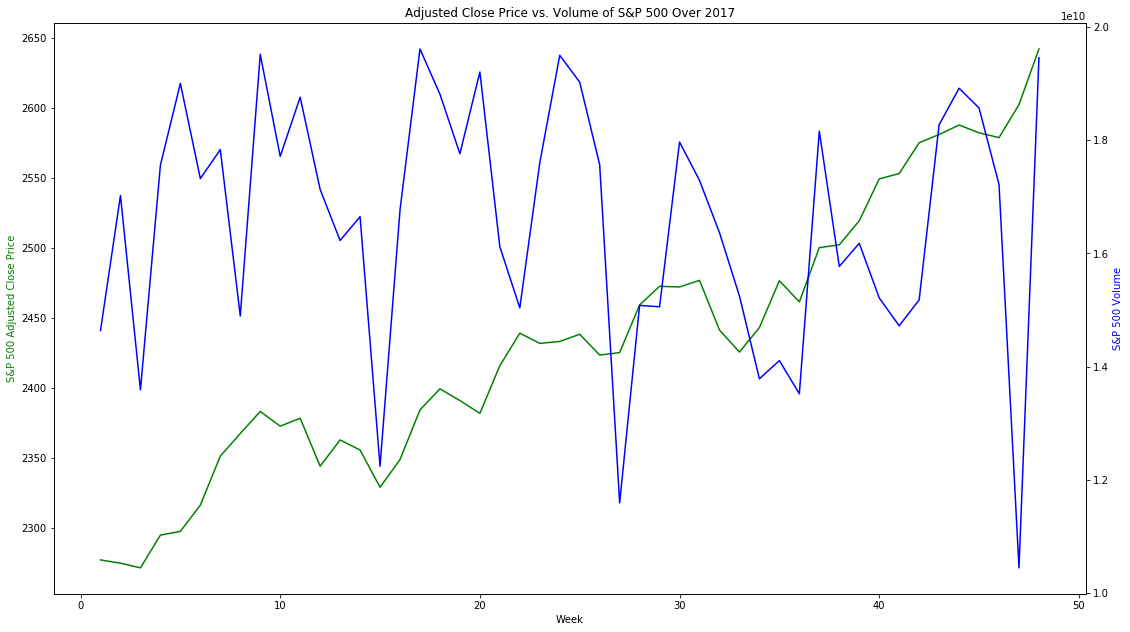

,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price
0,1/1/17,1,963.380005,1150.630005,806.659973,888.869995,888.869995,870316976,NaN,NaN
1,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897
2,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263
3,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446
4,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395


In [245]:
# plot
x = spdf['Period']
y1 = spdf['Adj Close']
y2 = spdf['Volume']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('S&P 500 Adjusted Close Price', color='g')
ax2.set_ylabel('S&P 500 Volume', color='b')
plt.title('Adjusted Close Price vs. Volume of S&P 500 Over 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('sp500_price_vs_volume.png')
plt.show()

# add empty column
df['Percentage Change in Volume'] = ''
df['Percentage Change in Price'] = ''

# Calculate percentage changes
df['Percentage Change in Volume'] = df['Volume'].pct_change()
df['Percentage Change in Price'] = df['Adj Close'].pct_change()

df.to_csv('sp500_results.csv')

df.head()

In [243]:
x = spdf['Adj Close']
y = spdf['Volume']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: 0.809948505359 r_value: -0.0356405521601 std_err: 3387827.25672


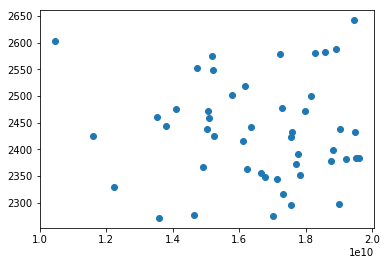

In [244]:
plt.scatter(spdf['Volume'], spdf['Adj Close'])
plt.show()

In [266]:
# add empty column
spdf['Percentage Change in Volume'] = ''
spdf['Percentage Change in Price'] = ''

# Calculate percentage changes
spdf['Percentage Change in Volume'] = spdf['Volume'].pct_change()
spdf['Percentage Change in Price'] = spdf['Adj Close'].pct_change()

spdf.to_csv('sp500_results.csv')

spdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Period,Percentage Change in Volume,Percentage Change in Price
0,1/1/17,2251.570068,2282.100098,2245.129883,2276.979980,2276.979980,14637130000,1,NaN,NaN
1,1/8/17,2273.590088,2279.270020,2254.250000,2274.639893,2274.639893,17020210000,2,0.162811,-0.001028
2,1/15/17,2269.139893,2276.959961,2258.409912,2271.310059,2271.310059,13591180000,3,-0.201468,-0.001464
3,1/22/17,2267.780029,2300.989990,2257.020020,2294.689941,2294.689941,17555940000,4,0.291716,0.010294
4,1/29/17,2286.010010,2298.310059,2267.209961,2297.419922,2297.419922,19001010000,5,0.082312,0.001190


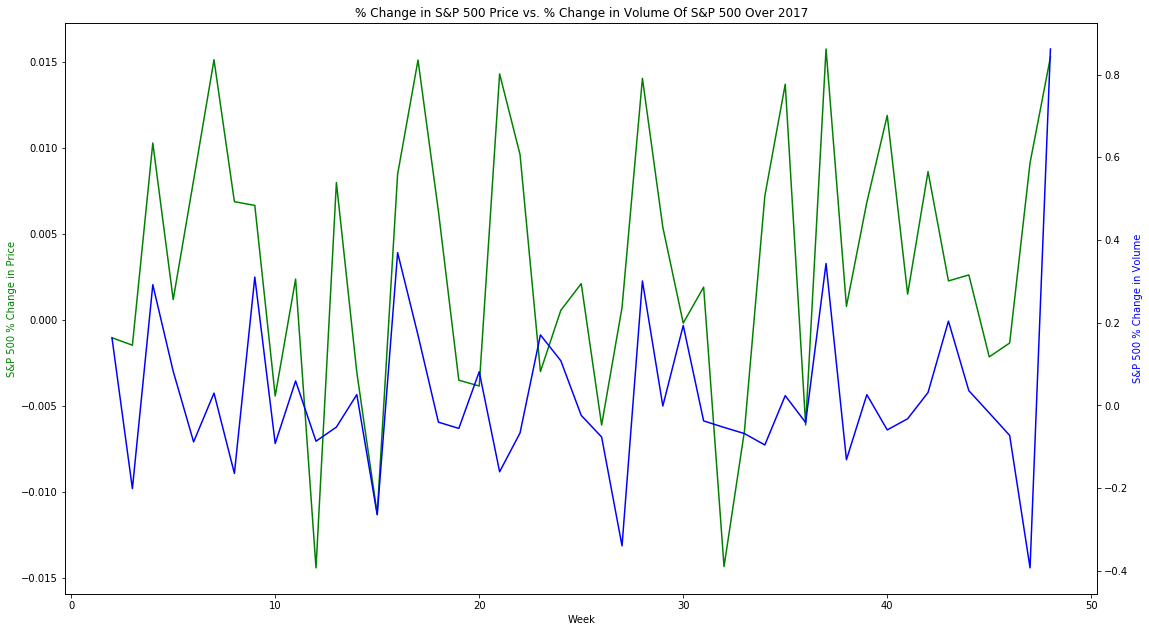

In [267]:
# plot
x = spdf['Period']
y1 = spdf['Percentage Change in Price']
y2 = spdf['Percentage Change in Volume']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('S&P 500 % Change in Price', color='g')
ax2.set_ylabel('S&P 500 % Change in Volume', color='b')
plt.title('% Change in S&P 500 Price vs. % Change in Volume Of S&P 500 Over 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('sp500_percent_changes.png')
plt.show()

In [268]:
x = spdf['Percentage Change in Price']
y = spdf['Percentage Change in Volume']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: nan r_value: nan std_err: nan


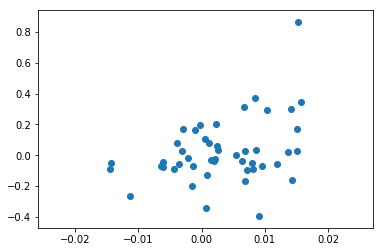

In [353]:
plt.scatter(spdf['Percentage Change in Price'], spdf['Percentage Change in Volume'])
plt.show()

In [350]:
#S&P merge with Bitcoin

sp_merge = pd.merge(spdf, dfnew, left_on=['Period'], right_on=['Period'])
sp_merge.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Period,Percentage Change in Volume_x,Percentage Change in Price_x,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Percentage Change in Volume_y,Percentage Change in Price_y
0,1/8/17,2273.590088,2279.270020,2254.250000,2274.639893,2274.639893,17020210000,2,0.162811,-0.001028,1/8/17,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897
1,1/15/17,2269.139893,2276.959961,2258.409912,2271.310059,2271.310059,13591180000,3,-0.201468,-0.001464,1/15/17,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263
2,1/22/17,2267.780029,2300.989990,2257.020020,2294.689941,2294.689941,17555940000,4,0.291716,0.010294,1/22/17,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446
3,1/29/17,2286.010010,2298.310059,2267.209961,2297.419922,2297.419922,19001010000,5,0.082312,0.001190,1/29/17,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395
4,2/5/17,2294.280029,2319.229980,2285.379883,2316.100098,2316.100098,17320440000,6,-0.088446,0.008131,2/5/17,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804


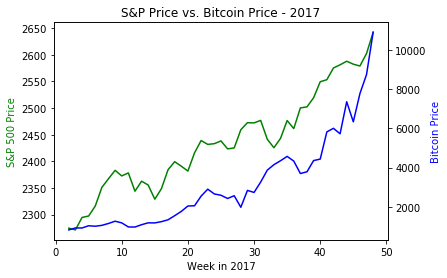

In [311]:
#plot
x = sp_merge['Period']
y1 = sp_merge['Adj Close_x']
y2 = sp_merge['Adj Close_y']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week in 2017')
ax1.set_ylabel('S&P 500 Price', color='g')
ax2.set_ylabel('Bitcoin Price', color='b')
plt.title('S&P Price vs. Bitcoin Price - 2017')
#fig.set_size_inches(18.5, 10.5)
plt.savefig('sp500vsbitcoin.png')
plt.show()

In [297]:
#S&P vs Bitcoin
x = sp_merge['Adj Close_x']
y = sp_merge['Adj Close_y']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: 2.30391308073e-19 r_value: 0.915072294432 std_err: 1.50514998724


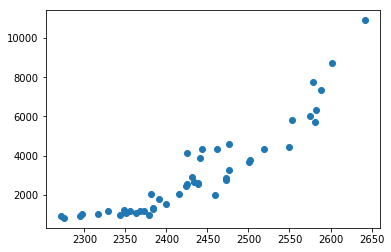

In [298]:
plt.scatter(sp_merge['Adj Close_x'], sp_merge['Adj Close_y'])
plt.show()

In [312]:
# Gold Analysis

# store file path
path = os.path.join('gold_data.csv')

# store in dataframe
gold_df = pd.read_csv(path)

gold_df.head()


,Date,USD (PM),Week
0,11/27/17,1294.90,48.0
1,11/20/17,1286.20,47.0
2,11/13/17,1277.95,46.0
3,11/6/17,1270.90,45.0
4,10/27/17,1266.45,44.0


In [313]:
#Merge Dataframes
gold_merge = pd.merge(gold_df, dfnew, left_on=['Week'], right_on=['Period'])
gold_merge.head()

,Date_x,USD (PM),Week,Date_y,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price
0,11/27/17,1294.90,48,11/26/17,48,8754.620117,11417.839840,8746.559570,10912.730470,10912.730470,9232150515,1.048654,0.246501
1,11/20/17,1286.20,47,11/19/17,47,7781.020020,8761.980469,7675.410156,8754.690430,8754.690430,4506447668,-0.339312,0.125150
2,11/13/17,1277.95,46,11/12/17,46,6339.870117,8000.189941,5493.640137,7780.910156,7780.910156,6820837677,-0.101841,0.227300
3,11/6/17,1270.90,45,11/5/17,45,7363.799805,7869.100098,6197.870117,6339.859863,6339.859863,7594241231,0.165879,-0.139050
4,10/27/17,1266.45,44,10/28/17,44,5726.609863,7492.240234,5679.370117,7363.799805,7363.799805,6513748502,0.566072,0.285892


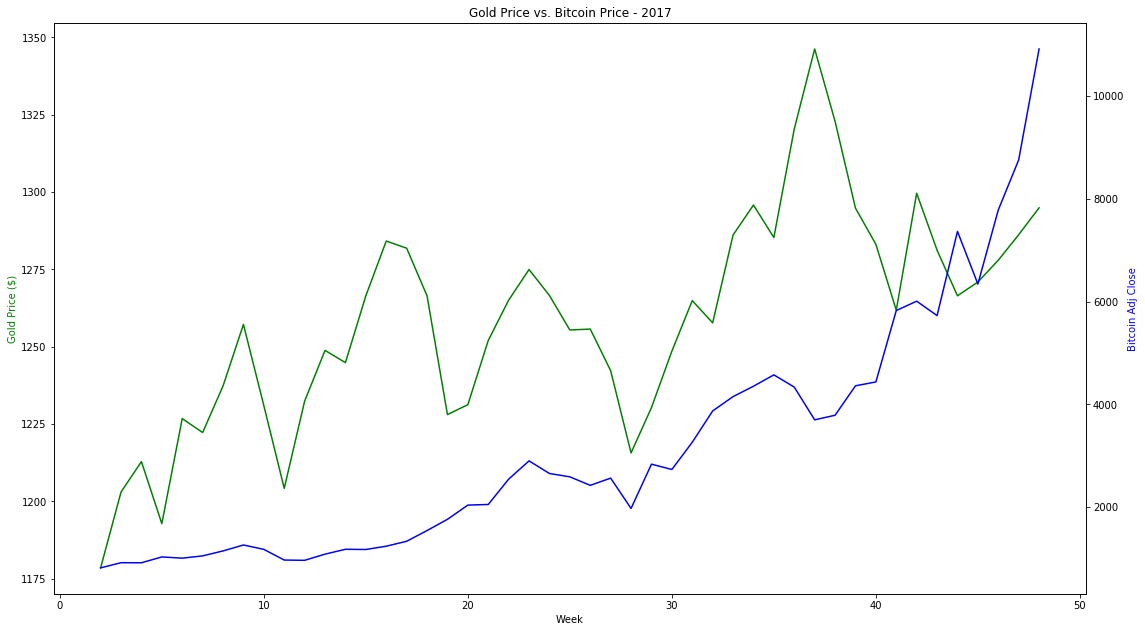

In [314]:
# plot
x = gold_merge['Week']
y1 = gold_merge['USD (PM)']
y2 = gold_merge['Adj Close']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('Gold Price ($)', color='g')
ax2.set_ylabel('Bitcoin Adj Close', color='b')
plt.title('Gold Price vs. Bitcoin Price - 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('gold_price.png')
plt.show()

In [315]:
#pvalue gold vs bitcoin

x = gold_merge['USD (PM)']
y = gold_merge['Adj Close']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)


p_value: 1.70773201831e-05 r_value: 0.582987103959 std_err: 8.1934024275


In [316]:
# add empty column
gold_merge['Gold Percentage Change in Price'] = ''

# Calculate percentage changes
gold_merge['Gold Percentage Change in Price'] = gold_df['USD (PM)'].pct_change()

gold_merge.to_csv('gold_results.csv')

gold_merge.head()

,Date_x,USD (PM),Week,Date_y,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price,Gold Percentage Change in Price
0,11/27/17,1294.90,48,11/26/17,48,8754.620117,11417.839840,8746.559570,10912.730470,10912.730470,9232150515,1.048654,0.246501,NaN
1,11/20/17,1286.20,47,11/19/17,47,7781.020020,8761.980469,7675.410156,8754.690430,8754.690430,4506447668,-0.339312,0.125150,-0.006719
2,11/13/17,1277.95,46,11/12/17,46,6339.870117,8000.189941,5493.640137,7780.910156,7780.910156,6820837677,-0.101841,0.227300,-0.006414
3,11/6/17,1270.90,45,11/5/17,45,7363.799805,7869.100098,6197.870117,6339.859863,6339.859863,7594241231,0.165879,-0.139050,-0.005517
4,10/27/17,1266.45,44,10/28/17,44,5726.609863,7492.240234,5679.370117,7363.799805,7363.799805,6513748502,0.566072,0.285892,-0.003501


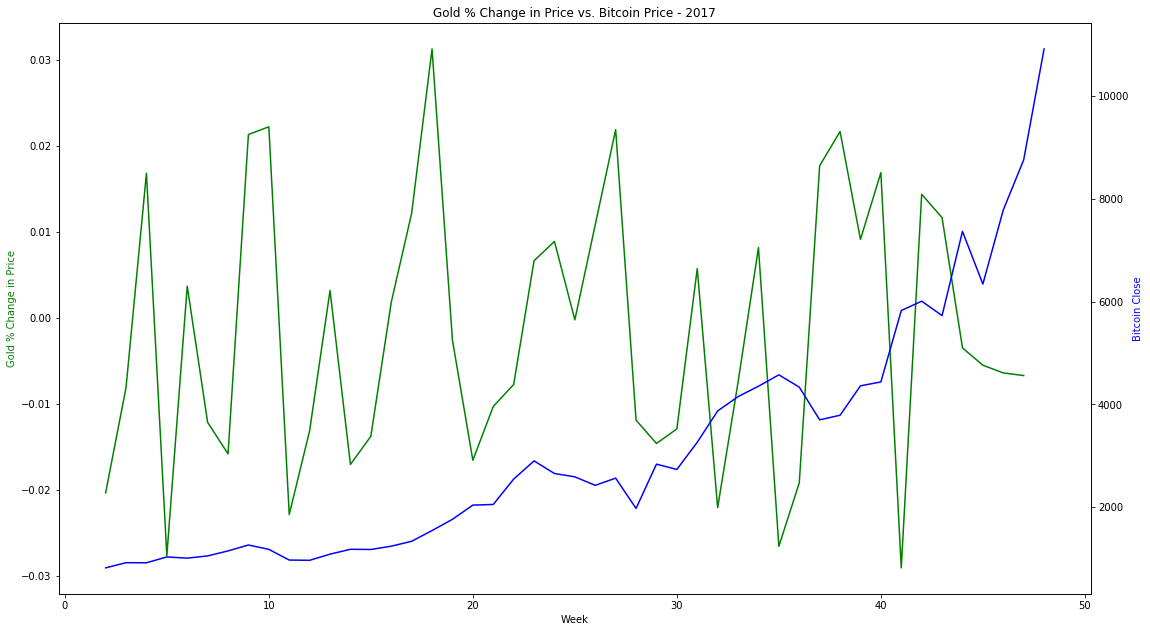

In [317]:
# plot
x = gold_merge['Week']
y1 = gold_merge['Gold Percentage Change in Price']
y2 = gold_merge['Adj Close']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('Gold % Change in Price', color='g')
ax2.set_ylabel('Bitcoin Close', color='b')
plt.title('Gold % Change in Price vs. Bitcoin Price - 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('gold_percent_changes.png')
plt.show()

In [318]:
#pvalue change in gold vs bitcoin

x = gold_merge['Gold Percentage Change in Price']
y = gold_merge['Adj Close']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: nan r_value: nan std_err: nan


In [303]:
# Oil Analysis

# store file path
path = os.path.join('oil_data.csv')

# store in dataframe
oil_df = pd.read_csv(path)

oil_df.head()

,DATE,DCOILWTICO,week
0,1/3/17,52.36,1
1,1/9/17,51.95,2
2,1/17/17,52.45,3
3,1/23/17,52.77,4
4,1/30/17,52.63,5


In [340]:
oil_merge = pd.merge(oil_df, dfnew, left_on=['week'], right_on=['Period'])
oil_merge.head()

,DATE,DCOILWTICO,week,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price
0,1/9/17,51.95,2,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897
1,1/17/17,52.45,3,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263
2,1/23/17,52.77,4,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446
3,1/30/17,52.63,5,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395
4,2/6/17,53.01,6,2/5/17,6,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804


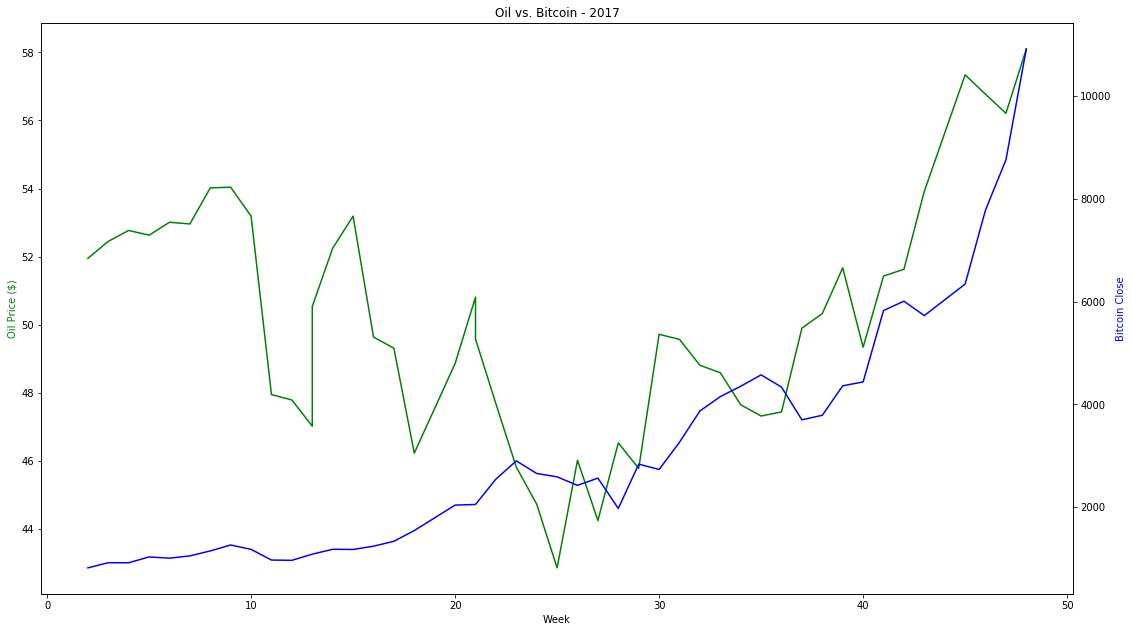

In [341]:
# plot
x = oil_merge['week']
y1 = oil_merge['DCOILWTICO']
y2 = oil_merge['Adj Close']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('Oil Price ($)', color='g')
ax2.set_ylabel('Bitcoin Close', color='b')
plt.title('Oil vs. Bitcoin - 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('oil_price.png')
plt.show()

In [342]:
x = oil_merge['DCOILWTICO']
y = oil_merge['Adj Close']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)
oil_merge.head()

p_value: 0.00864253258734 r_value: 0.37883216998 std_err: 89.4980214192


,DATE,DCOILWTICO,week,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price
0,1/9/17,51.95,2,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897
1,1/17/17,52.45,3,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263
2,1/23/17,52.77,4,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446
3,1/30/17,52.63,5,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395
4,2/6/17,53.01,6,2/5/17,6,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804


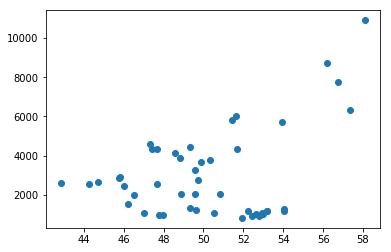

In [343]:
plt.scatter(oil_merge['DCOILWTICO'], oil_merge['Adj Close'])
plt.show()

In [344]:
# add empty column
oil_merge['Oil Percentage Change in Price'] = ''

# Calculate percentage changes
oil_merge['Oil Percentage Change in Price'] = oil_merge['DCOILWTICO'].pct_change()

oil_merge.to_csv('oil_results.csv')

oil_merge.head()

,DATE,DCOILWTICO,week,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price,Oil Percentage Change in Price
0,1/9/17,51.95,2,1/8/17,2,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.381562,-0.077897,NaN
1,1/17/17,52.45,3,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263,0.009625
2,1/23/17,52.77,4,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446,0.006101
3,1/30/17,52.63,5,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395,-0.002653
4,2/6/17,53.01,6,2/5/17,6,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804,0.007220


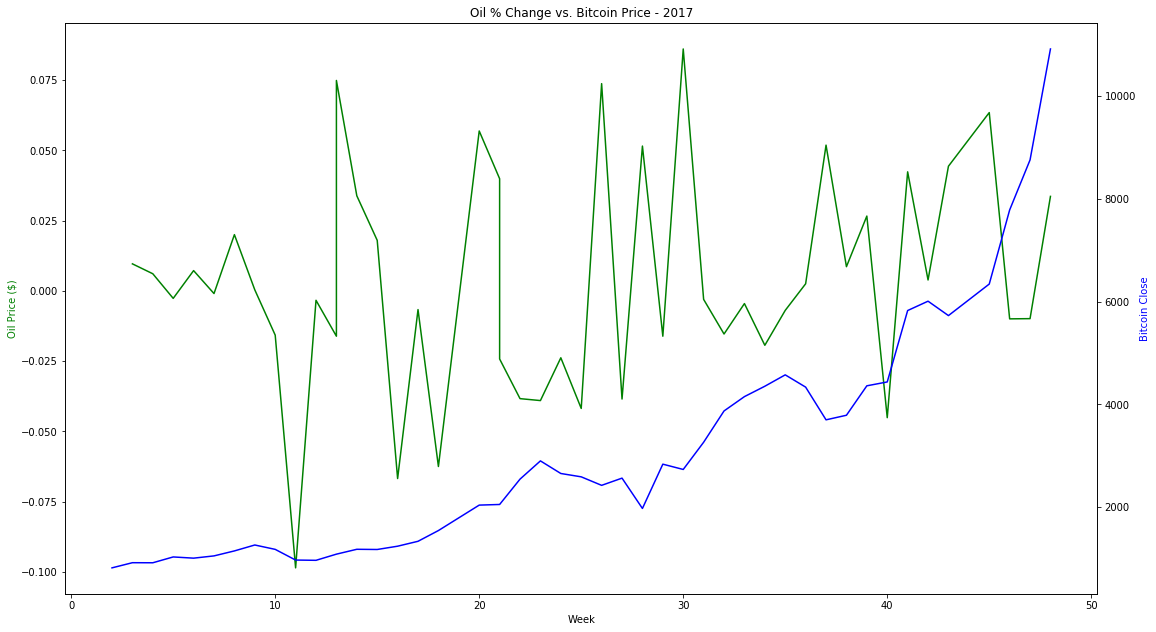

In [345]:
# plot
x = oil_merge['week']
y1 = oil_merge['Oil Percentage Change in Price']
y2 = oil_merge['Adj Close']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Week')
ax1.set_ylabel('Oil Price ($)', color='g')
ax2.set_ylabel('Bitcoin Close', color='b')
plt.title('Oil % Change vs. Bitcoin Price - 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('oil_percent_change_price.png')
plt.show()

In [346]:
oil_merge_new=oil_merge.dropna(how='any')
oil_merge_new.head()

,DATE,DCOILWTICO,week,Date,Period,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Volume,Percentage Change in Price,Oil Percentage Change in Price
1,1/17/17,52.45,3,1/15/17,3,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,-0.432982,0.122263,0.009625
2,1/23/17,52.77,4,1/22/17,4,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.232052,-0.001446,0.006101
3,1/30/17,52.63,5,1/29/17,5,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.182725,0.123395,-0.002653
4,2/6/17,53.01,6,2/5/17,6,1031.849976,1073.030029,924.650024,1008.320007,1008.320007,409135898,0.475986,-0.022804,0.007220
5,2/13/17,52.96,7,2/12/17,7,1008.320007,1063.209961,975.099976,1052.280029,1052.280029,224776336,-0.450607,0.043597,-0.000943


In [349]:
x = oil_merge['Oil Percentage Change in Price']
y = oil_merge['Adj Close']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('p_value:', p_value,'r_value:', r_value,'std_err:', std_err)

p_value: nan r_value: nan std_err: nan


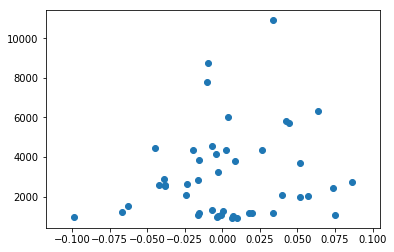

In [352]:
plt.scatter(oil_merge['Oil Percentage Change in Price'], oil_merge['Adj Close'])
plt.show()

In [358]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

    a = np.arange(48)
    moving_average(a)
    array([oil_merge['Oil Percentage Change in Price']])
    moving_average(a, n=48)
    array(oil_merge['Adj Close'])

In [365]:
ret

NameError: name 'ret' is not defined